## СЛУЧАЙ 1

Рассматривается задача об одноосном вращении некоторого космического аппарата. Управляющее воздействие реализуется с помощью управляющего момента двигателя. Примем за $u(t)$ - управляющий момент $T_{ctrl}$.
Уравнения модели:
$$
\left\{
\begin{array}
    \ J \cdot \ddot{\theta}= T_{ctrl} \\
    \dot{h_{rw}} = - T_{ctrl}
\end{array}
\right.
\qquad \rightarrow \qquad
\left\{
    \begin{array}\\
       \dot{\theta} = w \\
       \dot{w} = \frac{u(t)}{J}\\
       \dot{h} = -u(t)
    \end{array}   
\right. 
 \quad h\geq0, \quad |u|\leq \tau_{max}
$$

Начальное многообразие:
$$    
\quad   
x(t_0) \in A = \left\{
    \begin{array}\\
       h = h_0 \\
       \theta = \theta_{0} \\
       w = w_0\\
       t = 0
    \end{array}   
\right.
$$
Терминальное многообразие:
$$    
\quad   
x(t_f) \in B = \left\{
    \begin{array}\\
       \theta = 0 \\
       w = 0 \\
       t = t_f
    \end{array}   
\right.
$$


В задаче требуется обеспечить минимальное время $t_f$, которое тратится на стабилизацию космического аппарата (приведение его ориентации к требуемым условиям), функционал задачи:
$$\Phi(x(t_f), t_f) = t_f  \rightarrow \min_{u}$$
Приведем постановку к стандратному виду,когда функционал (терминальный) максимизируется:
$$ Ф^* = -t_f \rightarrow \max_{u}$$

Функция Гамильтона-Понтрягина:
$$H = p_\theta \cdot w + u\cdot(\frac{p_w}{J}-p_h) = p_\theta \cdot w + u\cdot k ,$$
\
где $ k(t) = \frac{p_w - J \cdot p_h}{J}$.
\
Дифференциальные уравнения на сопряженные переменные:
$$
\left\{
    \begin{array}\\
       \dot{p_\theta} = -\frac{\partial H}{\partial \theta} = 0 \\
       \dot{p_w} = -\frac{\partial H}{\partial w} = - p_\theta \\
       \dot{p_h} = -\frac{\partial H}{\partial h} = 0
    \end{array}   
\right. 
$$


Из уравнений на сопряженные переменные и последнего соотношения имеем:
$$
\left\{
    \begin{array}\\
       p_{\theta} = C_1\\
       p_{w} = C_2 - C_1 t\\
       p_h = C_3 
    \end{array}   
\right. 
$$

Поскольку гамильтониан линеен по своим по сопряженным переменным, то зададим произвольно условие:  $p_{\theta}(0)=0.01$.

Тогда оптимальное управление определяется знаком функции переключения k:
$$ u = \tau_{max} sign(k(t))$$

Тогда с учетом ограничений на управление оптимальное управляющее воздействие имеет вид:
$$\begin{equation*}
 \begin{cases}
   u = \tau_{max} , k >0
   \\
   u = 0, k = 0
   \\
   u = -\tau_{max}, k < 0
 \end{cases}
\end{equation*}$$

In [90]:
import numpy as np
from numpy import cos, sin, tan
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import fsolve

In [800]:
J = 1
tau_max = 1

theta_0 = 90 * np.pi/180 #[рад]
w_0 = -0.2 #[рад\сек]
h_0 = 0.6

theta_f = 0
w_f = 0
h_f = 0.6

In [782]:
def control(p_w,p_h):
    k = p_w - p_h/J
    
    if k > 0:
        return tau_max
    if k == 0:
        return 0
    if k < 0:
        return -tau_max

In [783]:
def rhs(t, R):

    dRdt = np.empty(6)

    theta = R[0].copy()
    w = R[1].copy()
    h = R[2].copy()
    p_theta = R[3].copy()
    p_w = R[4].copy()
    p_h = R[5].copy()

    dRdt[0] = w
    dRdt[1] = control(p_w,p_h) / J
    dRdt[2] = -control(p_w,p_h)
    dRdt[3] = 0
    dRdt[4] = -p_theta
    dRdt[5] = 0
    
    return dRdt

In [784]:
def Hamiltonian(R):
    
    theta = R[0]
    w = R[1]
    h = R[2]
    p_theta = R[0]
    p_w = R[1]
    p_h = R[2]
    
    return p_theta * w + control(p_w,p_h) * (p_w - p_h/J)

In [842]:
def plot(sol):
    t = sol.t.copy()
    theta = sol.y[0]
    w = sol.y[1]
    h = sol.y[2]
    
    p_theta = sol.y[3]
    p_w = sol.y[4]
    p_h = sol.y[5]
   
    H = [Hamiltonian([theta[j],w[j],h[j],p_theta[j],p_w[j],p_h[j]]) for j in range(len(theta))]
    u = [control(p_w[i],p_h[i]) for i in range(len(p_w))]
            
    plt.plot(theta,w,'-r')
    plt.plot(theta_0,w_0,'g-o')  
    plt.xlabel("Угол ориентации theta,рад")
    plt.ylabel("Угловая скорость w, рад\c")
    plt.xlim([-1.3*abs(max(theta)),1.3*abs(max(theta))])
    plt.ylim([-1.3*abs(max(w)),1.3*abs(max(w))])
    plt.title('Траектория КА на фазовой плоскости theta-w')
    plt.grid()
    plt.show()
         
    plt.plot(t,u,'-b')
    plt.xlabel("время,с")
    plt.ylabel("Управляющий момент T,Н*м")
    plt.title('График управления')
    plt.grid()
    plt.show()
    
    plt.plot(t,H,color = 'black')
    plt.xlabel("время,с")
    plt.ylabel("H, безразм. ед.")
    plt.title('Гамильтониан')
    plt.grid()
    plt.show()

In [812]:
#Используем метод пристрелки, чтобы найтиМетод пристрелки
# В качестве уравнений выбраны 4 краевых условия для угла ориентации и угловой скорости

def objective(unk):
    sol = solve_ivp(rhs, [0, unk[2]],[theta_0, w_0, h_0, 1, unk[0], unk[1]])
    
    theta = sol.y[0]
    w = sol.y[1]
    h = sol.y[2]
    
    return [theta[-1] - theta_f,
            w[-1] - w_f,
            h[-1] - h_f] #используем терминальные условия

In [813]:
#Начальные приближения выбираем из точек, когда результирующее положение стремится к нулевому
T = []
theraArr = []
wArr = []
reses = []

for i in range(0,100,1):
    time = i *0.1
    T.append(time)
            
    init_cond = [0.01,0.01,time]
    res = fsolve(objective, init_cond)
    tutu = objective(res)        
    theraArr.append(tutu[0])
    wArr.append(tutu[1])
    
norms = [theraArr[k]**2 + wArr[k]**2 for k in range(len(wArr))]

In [814]:
print('Норма ошибки конечного положения по углу ориентации и положению:', min(norms))

Норма ошибки конечного положения по углу ориентации и положению: 0.017729326249783278


In [815]:
init_cond = [0.01,0.01,T[np.argmin(norms)]]

SolveRes = fsolve(objective, init_cond)
print('Найденные начальные условия [p_w(0),p_h(0),tf] \n',*SolveRes)

Найденные начальные условия [p_w(0),p_h(0),tf] 
 -3.649355976610376 -2.188668975551093 -2.7795767222003316


In [818]:
# Вектор времени
t0 = 0
tf = SolveRes[2] #в радианах

tol = 1e-12

# начальные условия
R0 = np.array([theta_0, w_0, h_0,1, SolveRes[0], SolveRes[1]])

sol_traj = solve_ivp(rhs, [t0, tf], R0, method='LSODA', atol = tol, rtol = tol)
print(sol_traj.message)

The solver successfully reached the end of the integration interval.


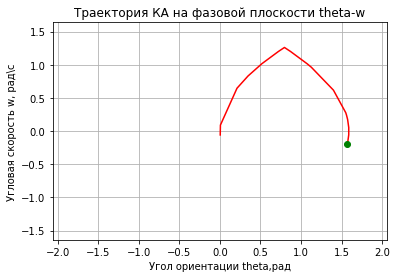

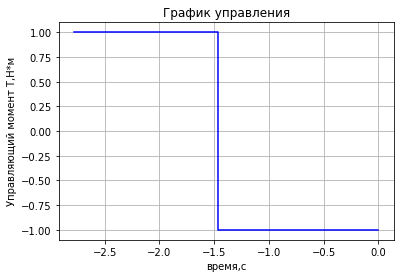

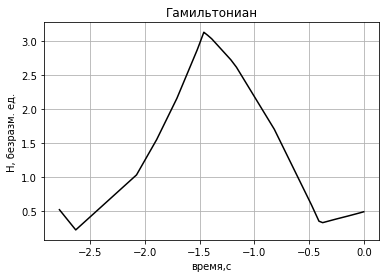

In [843]:
plot(sol_traj)

## СЛУЧАЙ 2

Рассмотрим второй случай,когда к ограничениям на управление добавляются ограничение на третью фазовую переменную- кинетический момент маховика:
$$ |h| \leq h_{max}$$ Для облегчения выкладок положим $J = 1$.

Такое ограничение на фазовую переменную можно переписать в виде:
$$ S(x) = \frac{1}{2}(h^2 - h_{max}^2) \leq 0 $$
\
Причем краевые условия тоже будут ограничены:
$$\left\{
\begin{array}
    \ |h(0)|\leq h_{max} \\
    |h(t_f)|\leq h_{max}
\end{array}
\right.$$

Тогда явно определим область начальных значений, для которых можно построить управление, переводящее систему из заданного начального положения в заданное конечное. Рассмотрим w(t) системы, изначально находящейся в $(\theta_0,w_0,h_0)$. Ввиду связи между значениями $p$ и $h$:
$$ w(t) = w_0 -\int\limits_{0}^{t} \dot{h(\tau)}d\tau = w_0 - (h(t) - h_0)$$
Посколько $w(t_f) = 0, |h(t_f)| < h_{max}$, то для точки $w_0$ получим ограничение:
$$ -h_{max} - h_0 < w_0 < h_{max} - h_0 $$

Ввиду того,что значение угла ориентации $\theta$ определяется интегрированием первого уравнения динамики системы, то $\theta_0$ может принимать любые значения на числовой прямой. Получим явный вид области допустимых начальных значений D:
$$ D = \{ (\theta,w,h) \in R^3: -\infty <\theta _0 < \infty, -h_{max} - h_0 < w_0 < h_{max} - h_0,  -h_{max} < h_0 < h_{max}\}. $$

Из необходимого условия оптимальности в задаче с фазовыми ограничениями из $\href{https://kafedra-opu.ru/old_cite/INTERN/Pont_PM.pdf}{статьи}$ следует, что существует функция $\psi(t)$,удовлетворяющая условию:
$$ \psi(t)\cdot S(x) = 0 $$

При этом по сравнению с предыдыщим случаем свой вид поменяют уравнения для сопряженных переменных:
$$ \left\{
    \begin{array}\\
       \dot{p_\theta} = -\frac{\partial H}{\partial \theta} + \psi \frac{\partial S}{\partial \theta} = 0 \\
       \dot{p_w} = -\frac{\partial H}{\partial w} + \psi \frac{\partial S}{\partial w} = - p_\theta \\
       \dot{p_h} = -\frac{\partial H}{\partial h} + \psi \frac{\partial S}{\partial h} = \psi h
    \end{array}   
\right.  $$

Причем $ p_h(t_f) = 0$, поскольку $|h(t_f)| < h_{max}$.

Тогда в области фазового ограничения $S(x) < 0$ оптимальное управление аналогично случаю 1 определяется знаком функции переключения:
$$ u = \tau_{max} sign(k(t))$$

В $\href{https://cyberleninka.ru/article/n/optimalnyy-sintez-v-zadache-odnoosnoy-stabilizatsii-sputnika-pri-nalichii-fazovyh-ogranicheniy/viewer}{работе}$ показано, что оптимальная траектория будет состоять из участков внутри области фазового ограничения и единственного граничного участка(где $S=0$). Причем функция внутри области $S <0$ будет $\psi(t) = 0$, а на граничных участках $u = 0$ и ,продифференцировав равенство $k = \frac{p_w - J \cdot p_h}{J}  = 0$, получим:
$$ \psi(t) = \frac{C^*_1}{h_{max}} sign(h) $$

Полученную ранне область допустимых начальных условий можно разделить на 6 непересекающихся подобластей, для которых можно ввести следующие определения:
$$ A_+ = \{ (\theta,w,h) \in R^3: \theta = -\frac{1}{2}w^2, -h_{max} - h < w < h_{max} - h,  -h_{max} \leq h \leq h_{max}\}. $$
$$ A_- = \{ (\theta,w,h) \in R^3: \theta = \frac{1}{2}w^2, -h_{max} - h < w < h_{max} - h,  -h_{max} \leq h \leq h_{max}\}. $$
$$ B_+ = \{ (\theta,w,h) \in R^3: \theta \neq -\frac{1}{2}w^2 \cdot sign(w), -2h_{max} < w < 0,  h = h_{max}\}. $$
$$ B_- = \{ (\theta,w,h) \in R^3: \theta \neq -\frac{1}{2}w^2 \cdot sign(w), 0 < w < 2h_{max},  h = -h_{max}\}. $$
$$ C_+ = \{ (\theta,w,h) \in R^3: \theta > -\frac{1}{2}w^2 \cdot sign(w), -h_{max} - h < w < h_{max} - h,  -h_{max} < h < h_{max}\}. $$
$$ C_- = \{ (\theta,w,h) \in R^3: \theta < -\frac{1}{2}w^2 \cdot sign(w), -h_{max} - h < w < h_{max} - h,  -h_{max} < h < h_{max}\}. $$

Таким образом, окончательно оптимальное управление определяется из системы:
$$\begin{equation*}
 \begin{cases}
   u = \tau_{max} , (\theta,w,h) \in (C_+ \cup A_+)
   \\
   u = 0, (\theta,w,h) \in (B_+ \cup B_+)
   \\
   u = -\tau_{max}, (\theta,w,h) \in (C_- \cup A_-)
 \end{cases}
\end{equation*}$$